<a href="https://colab.research.google.com/github/mariatomy9/Water_quality_quantity_estimation/blob/master/Water_quality_quantity_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project on Water Quality and Water Level Management System


 ## Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Preprocessing Data

In [ ]:
dataset = pd.read_csv('water_flow_sensor.csv')
X = dataset.iloc[:, [1,2]].values
y = dataset.iloc[:, 3].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[1 2 0 1 2 0 2 1 1 0 2 1 0 0 2 1 0 0 1 2 0 2 0 1 0 2 1 2 0 2 0 0 2 1 1 1 0
 2 0 2 0 0 1 2 0 0 1 1 2 0 1 0 2 0 1 0 2 1 0 2 2 0 1 0 2 2 1 0 1 0 0 0 2 0
 1 1 2 0 0 1 0 1 2 0 0 1 2 1 1 0 2 0 1 2 2 2 0 0 1 1 0 2 1 0 1 2 2 0 0 1 2
 1 0 1 2 0 0 1 2 1 2 0 2 1 1 2 0 0 1]


## Splitting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(y_train)

[2 0 0 1 0 0 2 2 1 2 0 0 1 0 2 2 2 1 1 0 1 2 0 2 1 2 1 1 2 0 1 0 2 2 2 1 1
 0 2 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 2 2 0 2 0 2 2 0 2 2 0 1 1 0 0 0 0
 2 0 2 2 1 1 1 0 2 1 2 0 0 2 1 0 1 0 2 2 0 0 0 2 1 0 2 1 1]


In [ ]:
print(y_test)

[0 0 0 0 1 2 0 1 0 1 2 2 2 0 0 1 0 2 1 1 0 1 2 1 1 1]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [ ]:
print(X_train)

[[0.59225513 0.54546337]
 [0.63439636 0.43024692]
 [0.46127563 0.38072155]
 [0.08997722 0.6004154 ]
 [0.85763098 0.76152422]
 [0.63439636 0.76115863]
 [0.48063781 0.75875948]
 [0.40888383 0.65970874]
 [0.12870159 0.25111018]
 [0.38154897 0.87437579]
 [0.85990888 0.98725022]
 [0.41116173 0.38081295]
 [0.50455581 0.7729259 ]
 [0.61275626 0.65719534]
 [0.49316629 0.67250422]
 [0.46583144 0.54428665]
 [1.         0.21577523]
 [0.85990888 0.13962955]
 [0.72095672 0.88816521]
 [0.976082   0.25333796]
 [0.1309795  0.65701255]
 [0.19703872 0.50775098]
 [0.6070615  0.6953533 ]
 [0.43166287 0.96188774]
 [0.48063781 0.99139732]
 [0.25284738 0.59378916]
 [0.37243736 0.65856629]
 [0.         0.22849645]
 [0.38154897 0.65868053]
 [0.73348519 0.88816521]
 [0.18451025 0.54294998]
 [0.73348519 0.49505832]
 [0.38154897 0.76897301]
 [0.20387244 0.87306654]
 [0.85990888 0.78331081]
 [0.48063781 0.26407703]
 [0.09225513 0.76110151]
 [0.08997722 0.77403408]
 [0.98633257 0.51016155]
 [0.85990888 0.37305569]


## Training the dataset using KNN Classification 

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.6511627906976745


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[50  0  0]
 [19 22  0]
 [10 16 12]]


## Data Visualisation

In [ ]:
from sklearn.model_selection import cross_val_score
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

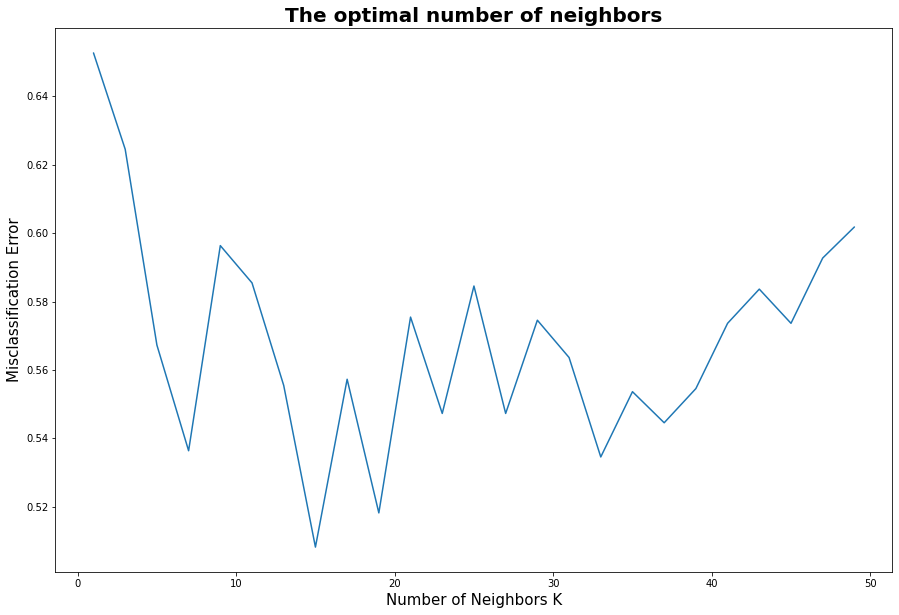

In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
import plotly.express as px
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 4.5MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
px.scatter_3d(dataset,x='total',y='pH rating',z='Places',color='created_at')

## Predicting Results

In [ ]:
dataset['Places'].value_counts()

Edakkode       50
Kottukal       41
Piripincode    38
Name: Places, dtype: int64

In [ ]:
dataset['Places'].value_counts().index

Index(['Edakkode', 'Kottukal', 'Piripincode'], dtype='object')

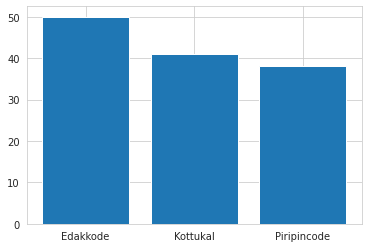

In [ ]:
import matplotlib.pyplot as plt
plt.bar(dataset['Places'].value_counts().index,dataset['Places'].value_counts())
plt.show()

In [ ]:
import numpy as np
z = np.arange(1,48)
from sklearn.model_selection import GridSearchCV
param = {'n_neighbors':z}
model = KNeighborsClassifier()
model_grid = GridSearchCV(model,param)
model_grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model_grid.best_params_

{'n_neighbors': 12}

### Predicting the region with poorest water quality

In [ ]:
means = dataset.groupby('Places')['pH rating'].mean()


In [ ]:
means

Places
Edakkode       5.801759
Kottukal       6.472177
Piripincode    6.341403
Name: pH rating, dtype: float64

### Edakkode village is facing poor quality of drinking water as the pH value shows water is highly acidic in nature.

### Predicting the region with lowest water level

In [ ]:
means1 = dataset.groupby('Places')['total'].mean()

In [ ]:
means1

Places
Edakkode       537.200000
Kottukal       478.658537
Piripincode    503.894737
Name: total, dtype: float64


### Kottukal village is facing mild water shortage.